# 1. Task : Short questions

What three attributes does every object in Python have without which it would not be a real object?

When and by whom was Python developed?

What are keyword arguments and how are they used in Python functions? Give an example.

Explain the concept of inheritance in Python.

Explain the Diamond problem using a small sketch.

Explain the difference between a class and an object (instance).

What is the difference between a class method and general functions?

What is an anonymous object (instance)?

How can you define and use your own exceptions in Python?

What role does the else clause play in error handling?

Explain the importance of the with statement when working with files.

What advantages do generators offer over traditional lists?

What happens when the yield statement is called in a generator function?

What is a thread and how is it different from a process?

How can you merge and synchronize multiple processes

# 2. Task:

**a)** Write a function `add_employee(...)` that creates and returns an employee as a dictionary. The employee should contain the keys `name`, `position`, `salary` and `entry_date`. 

Example call:

```python
employee = add_employee("John Doe", "Developer", 50000, "2023-01-15")
```

Also output the value for the key `entry_date` with the `print()` function.

In [18]:
#2a)
def add_employee(name, position, salary, entry_date):
    employee = {
           'name': name,
           'position': position,
           'salary': salary,
           'entry_date': entry_date
       }
    return employee

employee = add_employee("John Doe", "Developer", 50000, "2023-01-15")

print(employee['entry_date'])

2023-01-15


**b)** Given the following list:

```python
employee_list = [
add_employee('John Doe', 'Developer', 50000, '2023-01-15'),
add_employee('Jane Smith', 'Manager', 60000, '2019-05-20'),
add_employee('Alice Johnson', 'Designer', 55000, '2021-07-30')
]
```

Write a function `filter_employees(...)` that filters a list of employees by their start date and returns a list that only contains employees who started **after** January 1, 2024.

In [19]:
# given
employee_list = [
       add_employee('John Doe', 'Developer', 50000, '2023-01-15'),
       add_employee('Jane Smith', 'Manager', 60000, '2019-05-20'),
       add_employee('Alice Johnson', 'Designer', 55000, '2021-07-30')
   ]

# 2b)
def filter_employees(employee_list):
    new_list = []
    for employee in employee_list:
        if employee['entry_date'] > '2024-01-01':
            new_list.append(employee)

    return new_list

# not required
newies = filter_employees(employee_list)
print(newies) # es gibt in der gegebenen Liste keinen "Newie"

[]


**c)** Write a function `raise_salary(...)` that accepts a list of employees and a percentage, and returns a new list - without changing the previous one - of employees with the increased salaries.

Example call and output with the list from b):

```python
raised_salaries = raise_salary(employee_list, 10)
print(raised_salaries)
```

```
>>> [{'name': 'John Doe', 'position': 'Developer', 'salary': 55000.0, 'entry_date': '2023-01-15'}, 
{'name': 'Jane Smith', 'position': 'Manager', 'salary': 66000.0, 'entry_date': '2019-05-20'}, 
{'name': 'Alice Johnson', 'position': 'Designer', 'salary': 60500.0, 'entry_date': '2021-07-30'}]
```

In [22]:
#3c)
import copy

def raise_salary(employee_list, percent):
    new_list = copy.deepcopy(employee_list)
    for employee in new_list:
        employee['salary'] *= (1 + percent/100)

    return new_list

# Example call
raised_salaries = raise_salary(employee_list, 10)
print(raised_salaries)
print(employee_list)

[{'name': 'John Doe', 'position': 'Developer', 'salary': 60500.000000000015, 'entry_date': '2023-01-15'}, {'name': 'Jane Smith', 'position': 'Manager', 'salary': 72600.0, 'entry_date': '2019-05-20'}, {'name': 'Alice Johnson', 'position': 'Designer', 'salary': 66550.00000000001, 'entry_date': '2021-07-30'}]
[{'name': 'John Doe', 'position': 'Developer', 'salary': 55000.00000000001, 'entry_date': '2023-01-15'}, {'name': 'Jane Smith', 'position': 'Manager', 'salary': 66000.0, 'entry_date': '2019-05-20'}, {'name': 'Alice Johnson', 'position': 'Designer', 'salary': 60500.00000000001, 'entry_date': '2021-07-30'}]


**d)** Now create a parent dictionary that contains the departments as the key and a list of the employees in each department as the value.

Then write a function `get_employees_of(...)` that accepts a department and the department dictionary and returns a list of the employees who are employed in the passed department.

Example call and output:

```python
developer = get_employees_of("Development", department_dict)
print(developer)
```

```
>>> [{'name': 'John Doe', 'position': 'Developer', 'salary': 50000, 'entry_date': '2023-01-15'}]
```

In [7]:
#2d)
departments = {'Development': employee_list[0],
               'Design': employee_list[2],
               'Management': employee_list[1]}

def get_employees_of(department, depart_dict):
    return depart_dict[department]

get_employees_of("Development", departments)

{'name': 'John Doe',
 'position': 'Developer',
 'salary': 55000.00000000001,
 'entry_date': '2023-01-15'}

# 3. Task: 

The data protection department of your company has heard about your previous software and has lodged a complaint. The topic of salary is a sensitive issue and therefore this data must not be stored in the same data structure. For this reason, salaries should now be stored in a separate list `salary`. 

In the following, use this example list of salaries:

```python
salary = [50000, 60000, 55000, 70000, 45000]
```

**a)** First, write a generator function `report_salary(...)` that goes through the salary list and returns the salary data, consisting of the index and the value, one after the other.

Example output for a call:

`0: 50000 €`

In [27]:
salary = [50000, 60000, 55000, 70000, 45000]

#3a)
def report_salary(salary_list):
    for salary in salary_list:
        yield f"{salary_list.index(salary)}: {salary}"

# not required, but for control
gen = report_salary(salary)

In [28]:
next(gen)

'0: 50000'

The colleagues from the IT department also noticed something, for example the salary entries were not checked for accuracy, nor were the entries for creating a new employee profile.

**b)** Write a function `validate(...)` that checks whether a passed salary is positive. If the salary is invalid, it should throw a meaningful exception with the error message `has to be positive`, but **not** be caught. If the salary is valid, `salary valid` should be output. In any case, `validation ended` should be output.

Example:

```python
validate(50000)
validate(-1000)
```
Output:

```python
validation ended
salary valid
validation ended
---------------------------------------------------------------------------
Exception Traceback (most recent call last)
Cell In[2], line 2
1 validate(50000)
----> 2 validate(-1000)
. .
.
.
Exception: has to be positive
```

In [29]:
#3b)
def validate(salary):
    try:
        if salary <= 0:
            raise ValueError("has to be positive")
    finally:
        print("validation ended")

    print("salary is valid")

# not required
validate(50000)
validate(-1000)

validation ended
salary is valid
validation ended


ValueError: has to be positive

**c)** Write an improved function `add_employee_V2(...)` that creates and returns an employee as a dictionary. The employee should only contain the keys `name`, `position`, and `entry_date` (entry date). 

The function should test pre- and post-conditions and generate an exception if they are not met:

- Pre-conditions: The key `name` must not be empty.

- Post-condition: The created employee must not yet exist.

Example:

```python
employee_list_2 = []
employee_list_2.append(add_employee_V2('John Doe', 'Developer', '2023-01-15', employee_list_2))
employee_list_2.append(add_employee_V2('Jane Smith', 'Manager', '2019-05-20', employee_list_2))
employee_list_2.append(add_employee_V2('Alice Johnson', 'Designer', '2021-07-30', employee_list_2))

print(employee_list_2)

employee_list_2.append(add_employee_V2('John Doe', 'Developer', '2023-01-15', employee_list_2))
```
Output:
```python
[{'name': 'John Doe', 'position': 'Developer', 'startdate': '2023-01-15'}, 
{'name': 'Jane Smith', 'position': 'Manager', 'startdate': '2019-05-20'}, 
{'name': 'Alice Johnson', 'position': 'Designer', 'startdate': '2021-07-30'}]

---------------------------------------------------------------------------
AssertionError Traceback (most recent call last)
Cell In[85], line 18
14 employee_list_2.append(add_employee_V2('Alice Johnson', 'Designer', '2021-07-30', employee_list_2))
16 print(employee_list_2)
---> 18 employee_list_2.append(add_employee_V2('John Doe', 'Developer', '2023-01-15', employee_list_2))
...
```

In [33]:
#3c)
def add_employee_V2(name, position, entry_date, employee_list):
    assert name, "name is empty"
    employee = {'name' : name,
                'position' : position,
                'entry_date' : entry_date}
    assert employee not in employee_list, "employee already exists"
    return employee


# Example from the task
employee_list_2 = []
employee_list_2.append(add_employee_V2('John Doe', 'Developer', '2023-01-15', employee_list_2))
employee_list_2.append(add_employee_V2('Jane Smith', 'Manager',  '2019-05-20', employee_list_2))
employee_list_2.append(add_employee_V2('Alice Johnson', 'Designer', '2021-07-30', employee_list_2))

print(employee_list_2)

employee_list_2.append(add_employee_V2('John Doe', 'Developer', '2023-01-15', employee_list_2))

[{'name': 'John Doe', 'position': 'Developer', 'entry_date': '2023-01-15'}, {'name': 'Jane Smith', 'position': 'Manager', 'entry_date': '2019-05-20'}, {'name': 'Alice Johnson', 'position': 'Designer', 'entry_date': '2021-07-30'}]


AssertionError: employee already exists

# 4. Task:

You have a new colleague named Gregoor from the Netherlands. He keeps saying:

> "alles is een object" (German: "Everything is an object")

and keeps pointing his finger at you and your software. You're starting to get really annoyed...

**a)** To finally stop Greegor, go back to your software and implement a class `Employee` with the existing attributes `name`, `position`, `salary` and `entry_date` and the methods `get_name()` and `is_new()`. An employee whose entry date is in the current year is considered "new". The attribute `salary` should be strictly private, i.e. access via e.g. `employee.salary` is not possible (so that the data protection department doesn't complain).

![employee.png](attachment:employee.png)

Example call:

```python
employee = Employee('John Doe', 'Developer', 50000, '2023-01-15')

print(employee.get_name())

print(employee.is_new())
```

Output:

```python
John Doe
False
```
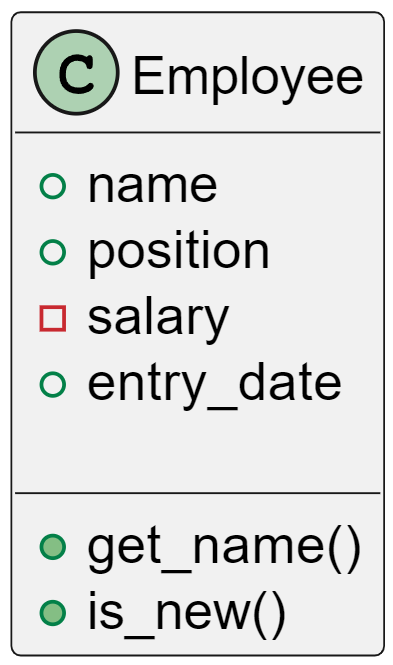

In [34]:
#4a)
class Employee:
    def __init__(self, name, position, salary, entry_date):
        self.name = name
        self.position = position
        self.__salary = salary
        self.entry_date = entry_date

    def get_name(self):
        return self.name
    
    def is_new(self):
        return self.entry_date > "2024-01-01"

#not required, due to task
employee = Employee('John Doe', 'Entwickler', 50000, '2023-01-15')
print(employee.get_name())
print(employee.is_new())
    
    

John Doe
False


**b)** Provide a way how the salary attribute could still be accessed from outside after implementing *a)*.

In [38]:
#4b)
#print(employee.salary) # doesn't work
#print(employee.__salary) # doesn't work
employee._Employee__salary = 100000     # fatal!
print(employee._Employee__salary)

100000


**c)** Therefore, add a property attribute `salary` to your class `Employee` and everything that is necessary for it so that the actual attribute can only be read but not written to. 

Example call: 

```python
print(employee.salary) # read
employee.salary = 100000 # write
```

Output:

```python
50000
---------------------------------------------------------------------------
AttributeError Traceback (most recent call last)
Cell In[111], line 31
30 print(employee.salary)
---> 31 employee.salary = 100000

AttributeError: property 'salary' of 'Employee' object has no setter
```

In [40]:
# 4c)
class Employee:
    def __init__(self, name, position, salary, entry_date):
        self.name = name
        self.position = position
        self.__salary = salary
        self.entry_date = entry_date

    def get_name(self):
        return self.name
    
    def is_new(self):
        return self.entry_date > "2024-01-01"
    
    def get_salary(self):
        return self.__salary
    
    salary = property(fget=get_salary)

# from the task
employee = Employee('John Doe', 'Entwickler', 50000, '2023-01-15')
print(employee.salary)
employee.salary = 100000

50000


AttributeError: property 'salary' of 'Employee' object has no setter

**d)** You have been promoted to manager thanks to your excellent work, congratulations! To make this clear in your software, create a new class `Manager` that inherits from the class `Employee`. The class `Manager` has the new attribute `team` and a new method `get_team()`.

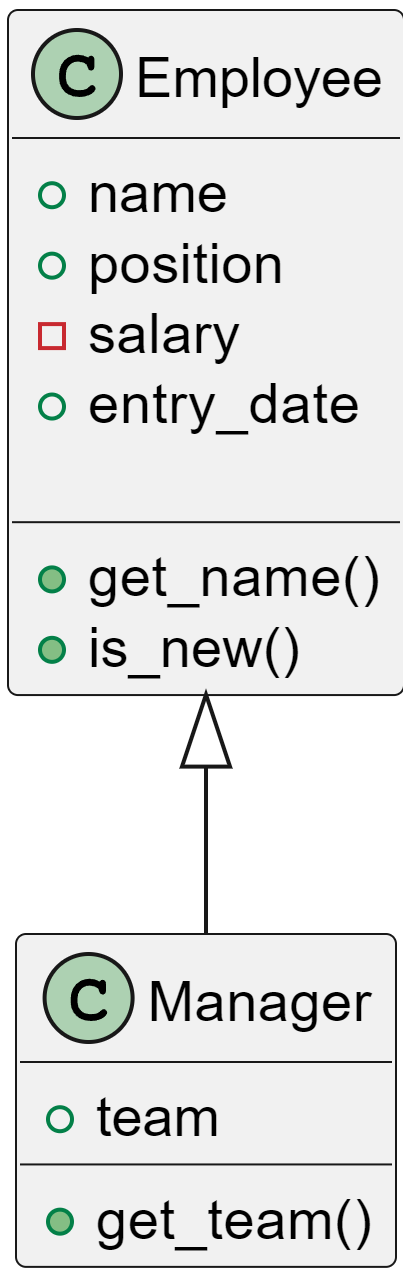

Example call:

```python
manager = Manager('Jane Smith', 'Manager', 120000, '2019-05-20', ['John Doe', 'Alice Johnson'])
print(manager.get_name())
print(manager.get_team())
```

Output:

```python
Jane Smith
['John Doe', 'Alice Johnson']
```

In [41]:
#4d)
class Manager(Employee):
    def __init__(self, name, position, salary, entry_date, team):
        super().__init__(name, position, salary, entry_date)
        self.team = team

    def get_team(self):
        return self.team

manager = Manager('Jane Smith', 'Manager', 120000, '2019-05-20', ['John Doe', 'Alice Johnson'])
print(manager.get_name())
print(manager.get_team())

Jane Smith
['John Doe', 'Alice Johnson']


# 5. Task:

As a manager, you now have to deal more with your company's HR department. One of the issues is the (un)popular topic of "salary". Unfortunately, the HR department has not yet received an update for the software's new object-oriented class structure. Therefore, employees are managed as tuples and salaries in separate lists (as in task 3).

**a)** Your first task is to integrate large amounts of employee data into the outdated system. So you come up with the idea of ​​parallelizing the whole thing. Write a working code to read employees from individual lists in parallel and add them to a common list. 

For this task, imagine two lists with the employees as tuples, `data1` and `data2`, which are added to a total list via separate threads. Since there are actually many more lists, please use the `threading` module and not a simple `all_data.append(data1)` and `all_data.append(data2)`.

The problem of synchronization will be neglected at this point.

Your example lists might look like this:

```python
data1 = [('John Doe', 'Developer', '2023-01-15'), ('Alice Johnson', 'Designer', '2021-07-30')]
data2 = [('Jane Smith', 'Manager', '2019-05-20')]
```

In [10]:
#5a)
# 1. Option
import threading

all_data = []

def add_employee_process(employee_list):
       for daten in employee_list:
           print(daten)
           all_data.append(daten)

daten1 = [('John Doe', 'Entwickler', '2023-01-15'), ('Alice Johnson', 'Designer', '2021-07-30')]
daten2 = [('Jane Smith', 'Manager', '2019-05-20')]

t1 = threading.Thread(target=add_employee_process, args=(daten1,))
t2 = threading.Thread(target=add_employee_process, args=(daten2,))

t1.start()
t2.start()

t1.join()
t2.join()

print(all_data)

('John Doe', 'Entwickler', '2023-01-15')
('Alice Johnson', 'Designer', '2021-07-30')
('Jane Smith', 'Manager', '2019-05-20')
[('John Doe', 'Entwickler', '2023-01-15'), ('Alice Johnson', 'Designer', '2021-07-30'), ('Jane Smith', 'Manager', '2019-05-20')]


In [43]:
#5a)
# 2. Option
import threading

def add_employee_process(overall_list , employee_list):
       for daten in employee_list:
           print(daten)
           overall_list.append(daten)


all_data = []

daten1 = [('John Doe', 'Entwickler', '2023-01-15'), ('Alice Johnson', 'Designer', '2021-07-30')]
daten2 = [('Jane Smith', 'Manager', '2019-05-20')]

t1 = threading.Thread(target=add_employee_process, args=(all_data, daten1))
t2 = threading.Thread(target=add_employee_process, args=(all_data, daten2))

t1.start()
t2.start()

t1.join()
t2.join()

print(all_data)

('John Doe', 'Entwickler', '2023-01-15')
('Alice Johnson', 'Designer', '2021-07-30')
('Jane Smith', 'Manager', '2019-05-20')
[('John Doe', 'Entwickler', '2023-01-15'), ('Alice Johnson', 'Designer', '2021-07-30'), ('Jane Smith', 'Manager', '2019-05-20')]


**b)** For the salary analysis, you have converted the salary lists into Numpy arrays:

```python
import numpy as np

salaries = np.array([50000, 60000, 55000, 70000, 45000])
mean_salary = np.mean(salaries)
std_deviation = np.std(salaries)
sum_salary = np.sum(salaries)
```

Write a code that now filters the salaries that are more than 50000 and then outputs them to the console.

Output for example:

```python
[60000 55000 70000]
```

In [3]:
# 5b)
# given
import numpy as np

salaries = np.array([50000, 60000, 55000, 70000, 45000])
mean_salary = np.mean(salaries)
std_deviation = np.std(salaries)
sum_salary = np.sum(salaries)

# 5b)
filtered = salaries[salaries > 50000]

# just for checking
print(filtered)

[60000 55000 70000]


In [6]:
# 5b) Alternatively with filter
# given
import numpy as np

salaries = np.array([50000, 60000, 55000, 70000, 45000])
mean_salary = np.mean(salaries)
std_deviation = np.std(salaries)
sum_salary = np.sum(salaries)

# 5b)
# filtered is then a list
filtered_list = list(filter(lambda s: s > 50000, salaries))
filtered = np.array(filtered_list)

# just for checking
print(filtered)

[60000 55000 70000]


**c)** Finally, you have to present your results to the board, but they have no idea about programming and numpy arrays, so you create a `tkinter` interface that allows entering a salary and showing if it is above or below average. The GUI could look like this:

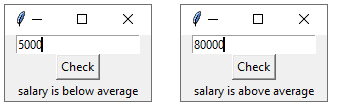

In [51]:
#5c)
# 1. Possibility via class definition
from tkinter import *

class GUI:
    def __init__(self, mean):
        self.root = Tk()
        self.output = StringVar()
        self.entry = Entry(master = self.root)
        self.entry.pack()

        self.button = Button(master = self.root, 
                             command = self.check,
                             text = "Check")
        self.button.pack()

        self.label = Label(master =self.root,
                           textvariable= self.output)
        self.label.pack()
        self.mean = mean
        self.root.mainloop()

    def check(self):
        if int(self.entry.get()) > self.mean:
            self.output.set("salary is above average")
        else:
            self.output.set("salary is below average")

gui = GUI(mean_salary)

In [52]:
# 2. Option
import tkinter as tk

def pruefe_gehalt():
    gehalt = int(entry.get())
    if gehalt > mean_salary:
        result_label.config(text="salary is above average")
    else:
        result_label.config(text="salary is below average")

root = tk.Tk()

entry = tk.Entry(root)
entry.pack()

check_button = tk.Button(root, text="Check", command=pruefe_gehalt)
check_button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

root.mainloop()